In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\jhank\Desktop\DA7\Projects\wego-shut_up_and_take_my_query\data\Headway Data.csv")
df.head(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,12.333333
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,36,11.383333


In [4]:
df.tail(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,23,9.166666
1981706,120221101,1,91057373,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,24,9.416666
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,31.933333
1981708,120221101,1,91057382,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,0.000000
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,20.916666
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [6]:
oper = df['OPERATOR'].nunique()

In [7]:
oper

458

In [8]:
eda1 = df[['ROUTE_ABBR','TRIP_ID','ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'SCHEDULED_HDWY', 'ROUTE_STOP_SEQUENCE','TRIP_EDGE','SCHEDULED_TIME','ACTUAL_ARRIVAL_TIME','ACTUAL_DEPARTURE_TIME','ADHERENCE','ADJUSTED_LATE_COUNT']]

In [9]:
eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ROUTE_ABBR             int64  
 1   TRIP_ID                int64  
 2   ROUTE_DIRECTION_NAME   object 
 3   HDWY_DEV               float64
 4   SCHEDULED_HDWY         float64
 5   ROUTE_STOP_SEQUENCE    float64
 6   TRIP_EDGE              int64  
 7   SCHEDULED_TIME         object 
 8   ACTUAL_ARRIVAL_TIME    object 
 9   ACTUAL_DEPARTURE_TIME  object 
 10  ADHERENCE              float64
 11  ADJUSTED_LATE_COUNT    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 181.4+ MB


Adherence is the amount of time between scheduled time and actual departure time. A negtive number means it left that long after the scheduled time, a postive number means it left before its scheduled_time.

Trip edge 1 is the start of a route, and 2 is the end. 

In [11]:
eda1.head()

,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,HDWY_DEV,SCHEDULED_HDWY,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_LATE_COUNT
0,7,297750,TO DOWNTOWN,1.983333,14.0,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,0
1,7,297750,TO DOWNTOWN,3.333333,14.0,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,0
2,7,297750,TO DOWNTOWN,NaN,NaN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,1
3,50,297749,TO DOWNTOWN,NaN,NaN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,0
4,50,297749,TO DOWNTOWN,NaN,NaN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,0


In [12]:
#All trip_edge #1
edge_one = eda1.loc[df['TRIP_EDGE'] == 1]

In [13]:
edge_one.head(20)

,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,HDWY_DEV,SCHEDULED_HDWY,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_LATE_COUNT
0,7,297750,TO DOWNTOWN,1.983333,14.0,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,0
3,50,297749,TO DOWNTOWN,NaN,NaN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,0
5,22,298143,TO DOWNTOWN,NaN,NaN,15.0,1,04:42:00,04:29:30,04:41:50,0.166666,0
9,22,298162,FROM DOWNTOWN,NaN,NaN,4.0,1,05:15:00,05:05:26,05:16:49,-1.816666,0
12,22,298128,TO DOWNTOWN,-0.366667,35.0,15.0,1,05:42:00,05:33:39,05:43:03,-1.050000,0
16,22,298151,FROM DOWNTOWN,1.116666,35.0,4.0,1,06:15:00,06:05:39,06:17:01,-2.016666,0
19,22,298129,TO DOWNTOWN,0.233333,60.0,15.0,1,06:42:00,06:34:28,06:43:17,-1.283333,0
23,22,298152,FROM DOWNTOWN,3.366666,30.0,4.0,1,07:15:00,07:16:14,07:20:07,-5.116666,0
27,22,298130,TO DOWNTOWN,-1.466667,63.0,15.0,1,07:45:00,07:40:28,07:44:49,0.183333,0
30,22,298153,FROM DOWNTOWN,1.183333,30.0,4.0,1,08:15:00,08:09:52,08:19:12,-4.200000,0


DF by route #

In [ ]:
eda1['ROUTE_ABBR'].unique()

In [33]:
route50 = eda1.loc[df['ROUTE_ABBR'] == 50]


,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,HDWY_DEV,SCHEDULED_HDWY,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_LATE_COUNT
3,50,297749,TO DOWNTOWN,NaN,NaN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,0
4,50,297749,TO DOWNTOWN,NaN,NaN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,0
1650,50,299544,TO DOWNTOWN,NaN,NaN,14.0,1,04:39:00,04:29:38,04:41:06,-2.100000,0
1651,50,299544,TO DOWNTOWN,NaN,NaN,13.0,0,04:45:00,04:45:21,04:45:21,-0.350000,0
1652,50,299544,TO DOWNTOWN,NaN,NaN,12.0,0,04:52:00,04:51:28,04:51:28,0.533333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981706,50,329896,FROM DOWNTOWN,NaN,NaN,10.0,2,07:35:00,07:31:25,07:40:50,-5.833333,0
1981709,50,329980,TO DOWNTOWN,NaN,NaN,6.0,1,15:05:00,14:46:41,15:07:36,-2.600000,0
1981710,50,329980,TO DOWNTOWN,NaN,NaN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,0
1981711,50,330003,TO DOWNTOWN,-2.366667,10.0,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,0


### Clean table one. Route, trip id, trip edge(1), headway deviation, adherence

In [15]:
dfone = df[['ROUTE_ABBR','TRIP_ID','TRIP_EDGE','HDWY_DEV','ADHERENCE']]

In [16]:
dfone.columns = ['route','trip_id','trip_edge','hdwy_dev', 'adherence']

In [17]:
df2 = dfone.loc[df['TRIP_EDGE'] == 1]

In [18]:
df3 = dfone.loc[df['TRIP_EDGE'] == 2]

In [19]:
df3

,route,trip_id,trip_edge,hdwy_dev,adherence
2,7,297750,2,NaN,-20.183333
4,50,297749,2,NaN,10.016666
8,22,298143,2,NaN,4.566666
11,22,298162,2,NaN,-1.650000
15,22,298128,2,NaN,4.350000
...,...,...,...,...,...
1981706,50,329896,2,NaN,-5.833333
1981708,55,329899,2,NaN,9.483333
1981710,50,329980,2,NaN,-2.733333
1981712,50,330003,2,NaN,26.733333


In [24]:
driver = df[['ROUTE_ABBR','OPERATOR','ADHERENCE','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]

<AxesSubplot:xlabel='OPERATOR', ylabel='ADJUSTED_ONTIME_COUNT'>

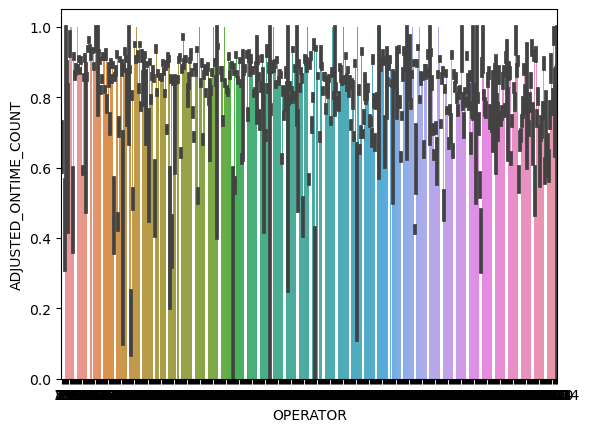

In [30]:
sns.barplot(data=driver,x='OPERATOR',y='ADJUSTED_ONTIME_COUNT')